<ipython-input-3-3e24764def06>:14: FutureWarning: The `geometries` module and `geometries_from_X` functions have been renamed the `features` module and `features_from_X` functions. Use these instead. The `geometries` module and function names are deprecated and will be removed in the v2.0.0 release. See the OSMnx v2 migration guide: https://github.com/gboeing/osmnx/issues/1123
  pontos_onibus = ox.geometries_from_place(lugar, tags={'highway': 'bus_stop'})


A parada de ônibus mais próxima da UFRN é:
bus                                                         yes
highway                                                bus_stop
public_transport                                       platform
geometry                         POINT (-35.2091618 -5.7907104)
name                                                        NaN
short_name                                                  NaN
bench                                                       NaN
bin                                                         NaN
shelter                                                     NaN
wheelchair                                                  NaN
tactile_paving                                              NaN
lit                                                         NaN
source                                                      NaN
passenger_information_display                               NaN
departures_board                                            N

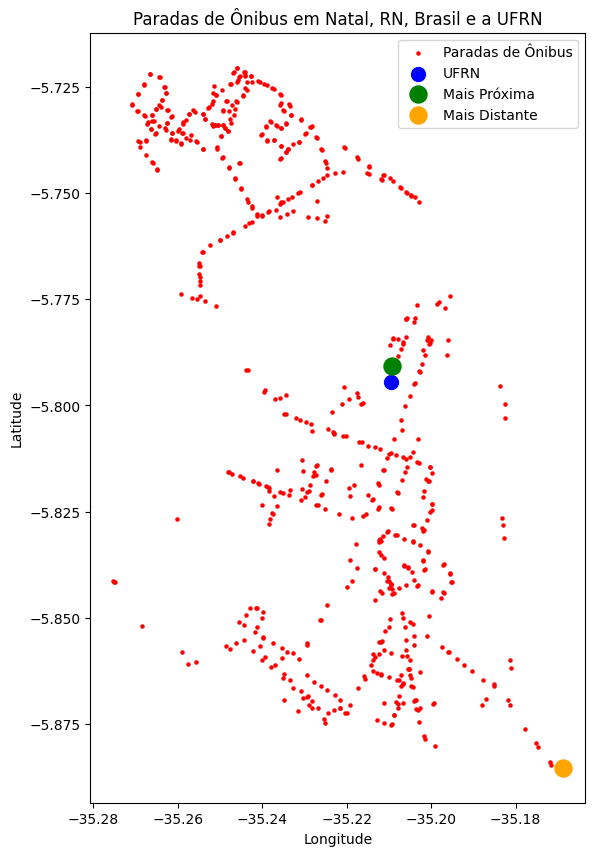

In [3]:
!pip install osmnx
import osmnx as ox
import geopandas as gpd
import matplotlib.pyplot as plt
from shapely.geometry import Point

# Define a localização da UFRN
ufrn_location = Point(-35.2095, -5.7945)  # Coordenadas aproximadas da UFRN

# Define a localização para as paradas de ônibus
lugar = "Natal, RN, Brasil"

# Obtém as paradas de ônibus
pontos_onibus = ox.geometries_from_place(lugar, tags={'highway': 'bus_stop'})

# Adiciona uma coluna com as distâncias até a UFRN
pontos_onibus['distance_to_ufrn'] = pontos_onibus.geometry.apply(lambda x: x.distance(ufrn_location))

# Encontra a parada mais próxima
parada_mais_proxima = pontos_onibus.loc[pontos_onibus['distance_to_ufrn'].idxmin()]

# Encontra a parada mais distante
parada_mais_longe = pontos_onibus.loc[pontos_onibus['distance_to_ufrn'].idxmax()]

# Mostra as paradas mais próxima e mais distante
print("A parada de ônibus mais próxima da UFRN é:")
print(parada_mais_proxima)

print("\nA parada de ônibus mais distante da UFRN é:")
print(parada_mais_longe)

# Plota os pontos de ônibus e a UFRN
fig, ax = plt.subplots(figsize=(10, 10))
pontos_onibus.plot(ax=ax, color='red', markersize=5, label='Paradas de Ônibus')
ax.scatter(*ufrn_location.xy, color='blue', marker='o', s=100, label='UFRN')

# Destaca as paradas mais próxima e mais distante
ax.scatter(*parada_mais_proxima.geometry.xy, color='green', marker='o', s=150, label='Mais Próxima')
ax.scatter(*parada_mais_longe.geometry.xy, color='orange', marker='o', s=150, label='Mais Distante')

ax.legend()
plt.title(f'Paradas de Ônibus em {lugar} e a UFRN')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.show()